# MAKE SURE YOU RUN ON **GPU**!!!: *Select* **Runtime** -> **Change Runtime Type** -> *Select* **GPU** as your hardware acclerator!

# It is the maze again!!!

——————

Be careful, this maze is a little bit different, there are more paths to reach the state 8!

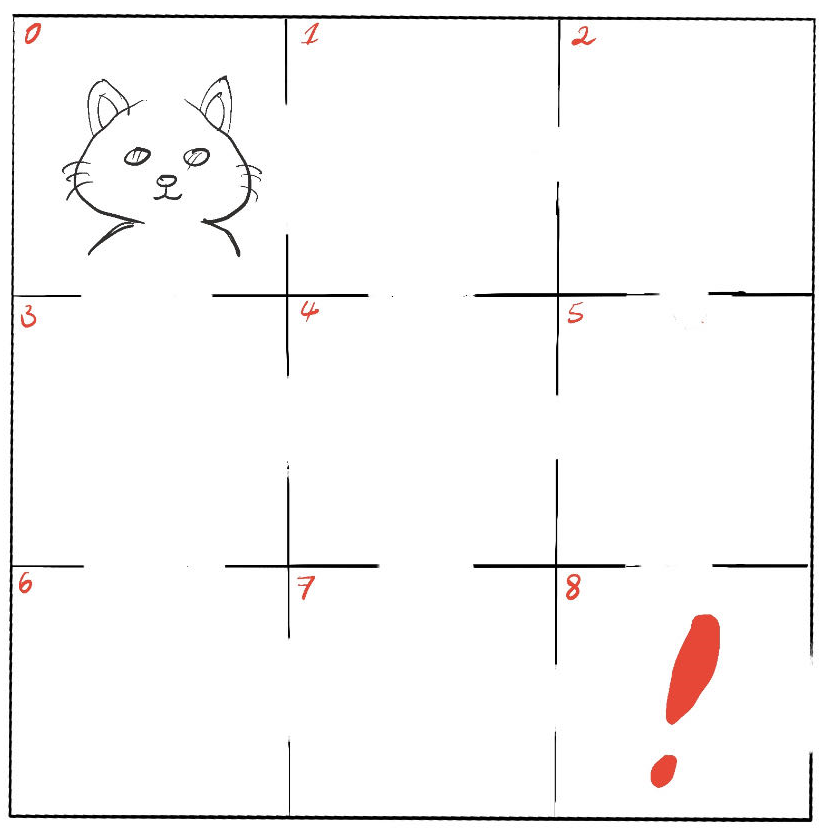

In [12]:
import numpy as np

def run_Q_learning(rewards):
  # Initialize the Q-table to 0
  Q_table = np.zeros((9, 9))

  # Initialize the value of each state to 0
  state_values = np.zeros(9)

  # Set the reward for each state
  rewards = rewards

  # Set the transition probabilities between states
  transition_probabilities = np.array([
      [  0, 1/2,   0, 1/2,   0,   0,   0,   0,   0],
      [1/3,   0, 1/3,   0, 1/3,   0,   0,   0,   0],
      [  0, 1/2,   0,   0,   0, 1/2,   0,   0,   0],
      [1/3,   0,   0,   0, 1/3,   0, 1/3,   0,   0],
      [  0, 1/4,   0, 1/4,   0, 1/4,   0, 1/4,   0],
      [  0,   0, 1/3,   0, 1/3,   0,   0,   0, 1/3],
      [  0,   0,   0, 1/2,   0,   0,   0, 1/2,   0],
      [  0,   0,   0,   0, 1/3,   0, 1/3,   0, 1/3],
      [  0,   0,   0,   0,   0,   0,   0,   0,   1]
  ])

  # Set the discount factor
  gamma = 0.9

  # Set the learning rate
  alpha = 0.1

  # Set the exploration rate
  epsilon = 0.1

  # Run the Q-learning algorithm
  for _ in range(100):
      # Start in a random state
      s = np.random.randint(9)

      while s != 8:
          # Identify valid actions
          valid_actions = np.where(transition_probabilities[s]>0)[0]

          # Choose an action
          if np.random.uniform(0, 1) < epsilon:
              # Explore: choose a random valid action
              a = np.random.choice(valid_actions)
          else:
              # Exploit: choose the valid action with the highest Q-value
              a = valid_actions[np.argmax(Q_table[s, valid_actions])]

          # Get the next state based on the action taken
          s_next = a

          # Get the reward for the action
          r = rewards[s_next]

          # Update the Q-value for the state-action pair
          Q_table[s, a] = Q_table[s, a] + alpha * (r + gamma * np.max(Q_table[s_next]) - Q_table[s, a])

          # Move to the next state
          s = s_next

  return Q_table

def best_path(Q_table):
  cur_state = 0

  for i in range(5):
    print(cur_state)
    cur_state = np.argmax(Q_table[cur_state])

In [19]:
rewards = np.array([0, 5, 5, 5, 5, 5, 5, 5, 100])
Q_table = run_Q_learning(rewards)
best_path(Q_table)

0
1
4
5
8


Depends on the reward that you assign to each state, the best path return is going to be differnt.

**Question 3.9**: Set rewards so that the best path will be: 0 -> 3 -> 6 -> 7 -> 8

In [ ]:
# TODO

**Question 3.10**: Set rewards so that the best path will be: 0 -> 3 -> 4 -> 5 -> 8

In [ ]:
# TODO

# Let's play an atari game!! 

- More specifically we going to play the [Atari Breakout](https://en.wikipedia.org/wiki/Breakout_(video_game)) (did not choose this on purpose beacuse of Breakout Mentors ;) )

---



In [1]:
## gonna install some stuff 
!apt-get install swig cmake
!pip install gymnasium[atari] >= 0.28.1
!pip install gymnasium[accept-rom-license] >= 0.28.1
!pip install stable-baselines3[extra] == 2.0.0

UsageError: Line magic function `%%capture` not found.


**Question 3.11**: Let's make Breakout game environment and render it in *"rgb_mode"* !

[Hint](https://www.gymlibrary.dev/environments/atari/breakout/)

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

env = #TODO
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

**Question 3.12**: Let's create and train a [DQN](https://stable-baselines.readthedocs.io/en/master/modules/dqn.html) model using stable-baseline3!

In [ ]:
# Create the DQN model with "CnnPolicy", buffer_size of 10000, learning rate 0.001, and verbose = 1
model = # TODO

# Train the model with 20000 timesteps
# TODO

## Let's see your model in action!

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

vec_env = model.get_env()
obs = vec_env.reset()
img = plt.imshow(env.render())


while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if dones:
      break

env.close()

Ummmmm...., it might not perform as well as you expected. But at least it moves, right!? If you want it to be better, try to train your agent with more steps. That is, at least 50000 timesteps!